In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU

In [7]:
data = pd.read_csv(r'train.csv')


In [3]:
data.columns

Index(['datetime', 'nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc',
       'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav',
       'TQL_dav', 'W2M_dav', 'Holiday_ID', 'holiday', 'school'],
      dtype='object')

In [11]:
data = data[['id', 'title', 'description', 'publishTime', 'kind_stats',
       'duration_seconds', 'viewCount', 'likeCount', 'commentCount']]

In [4]:
data.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [8]:
data.set_index('datetime', inplace=True)
data.index = pd.to_datetime(data.index, format='mixed',dayfirst=True)

In [9]:
data['month'] = data.index.month
data['week'] = data.index.isocalendar().week

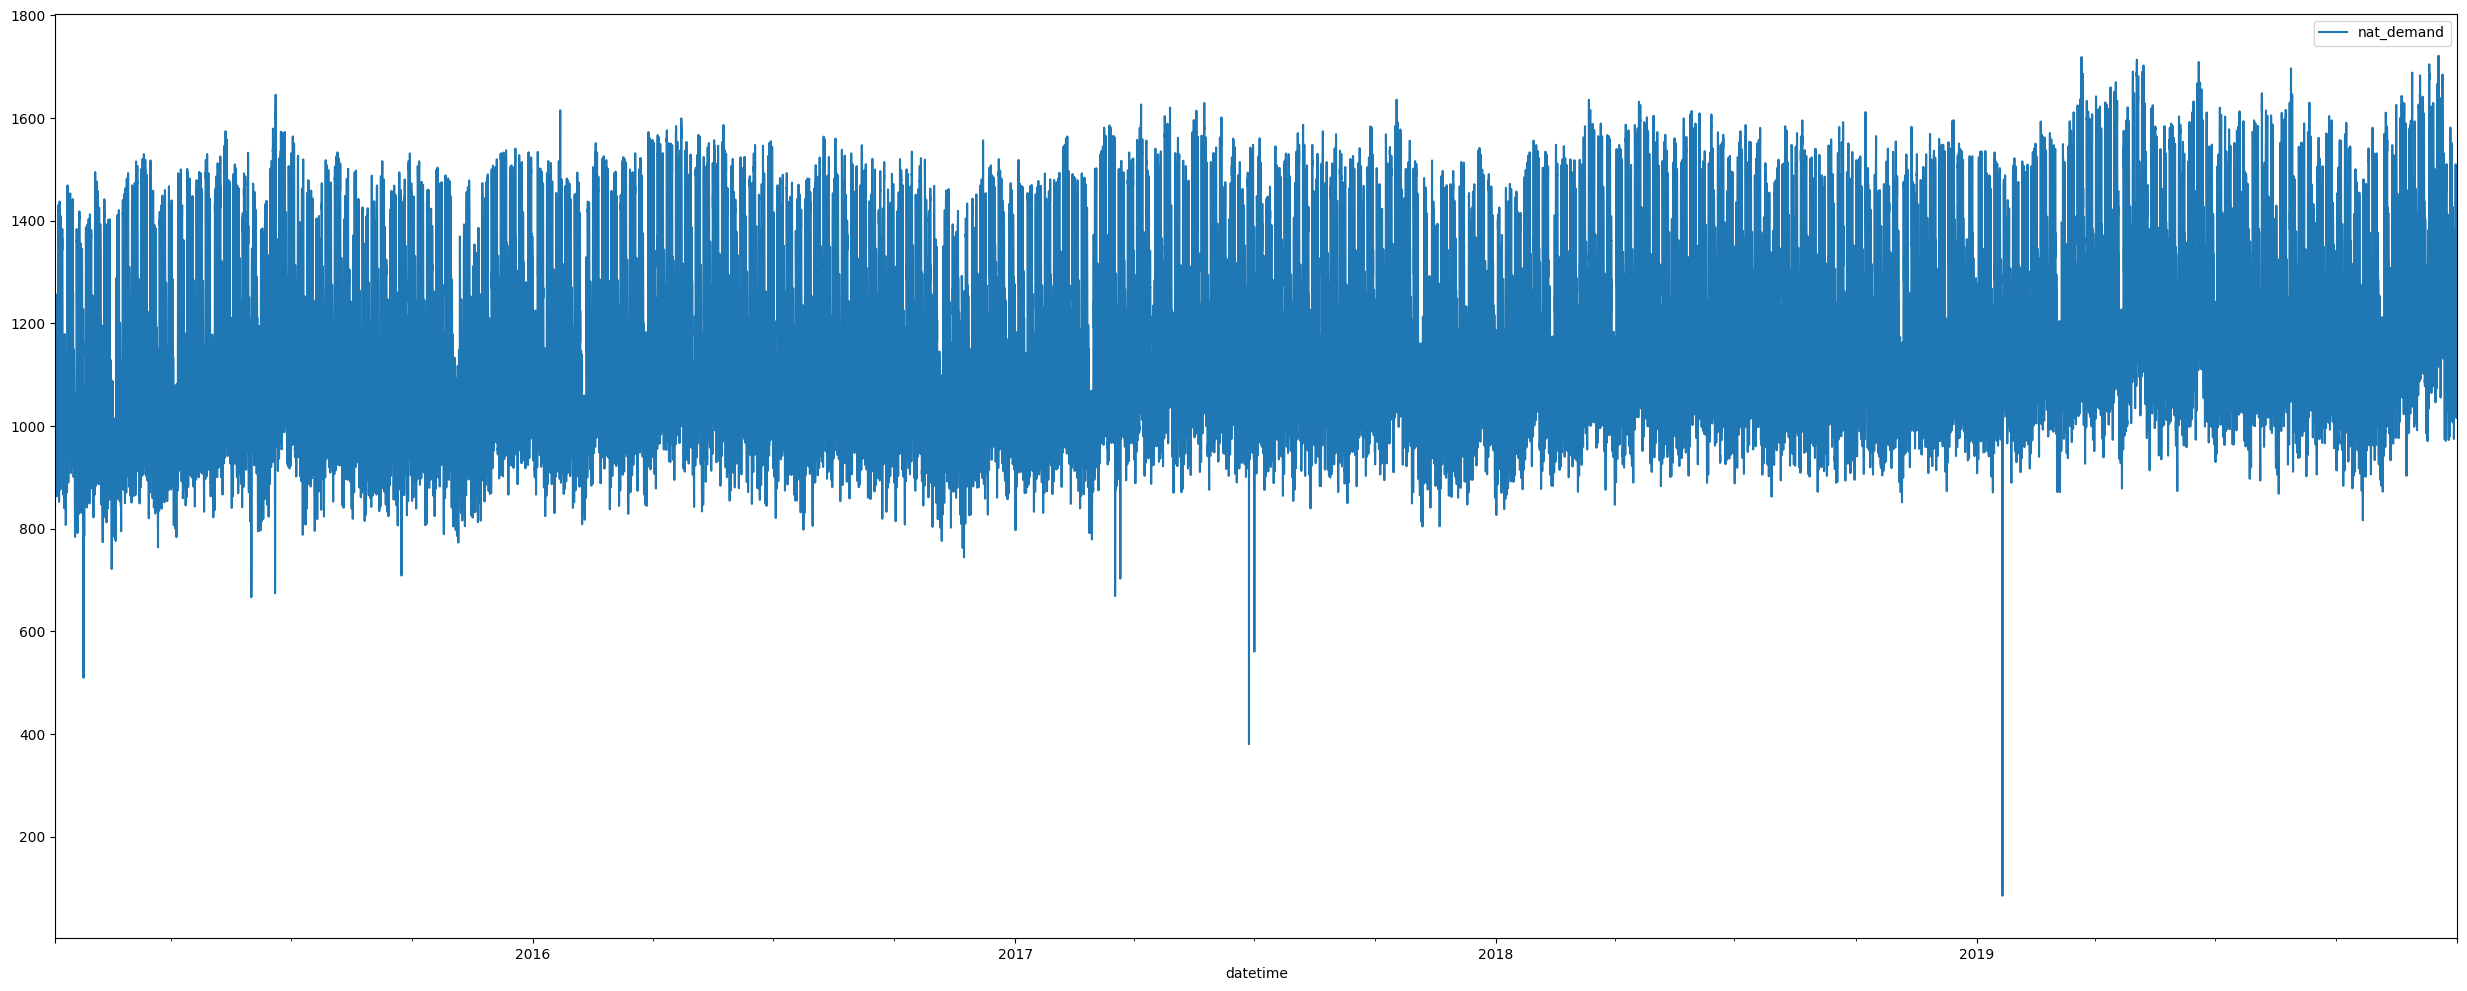

In [13]:
data.plot(y='nat_demand',figsize=(31,12));

In [14]:
data_vf = data[['nat_demand']].values

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
data_vf = scaler.fit_transform(data_vf)

In [16]:
def preparar_datos(data,longitud):
    X,y = [],[]
    for i in range(len(data)-longitud):
        X.append(data[i:i+longitud])
        y.append(data[i+longitud])
    X= np.array(X)
    y = np.array(y)

    return X,y

longitud = 10
X,y = preparar_datos(data_vf,longitud)

In [17]:
train = int(len(X)*0.75)
test = len(X) - train


In [18]:
X_train,X_test = X[:train],X[train:]
y_train,y_test = y[:train],y[train:]

In [19]:
X_train.shape

(32823, 10, 1)

In [20]:
X_test.shape

(10942, 10, 1)

In [21]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [22]:
X_train.shape

(32823, 10, 1)

Red Neuronal Recurrente Simple



In [23]:
model = Sequential([
    SimpleRNN(100,activation='relu',input_shape=(longitud,1),return_sequences=True),

    SimpleRNN(70,activation='relu',return_sequences=True),
    layers.BatchNormalization(), # Normaliza los batch que vayan entrado, para reducir overfitting

    SimpleRNN(30,activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(1)
]) 

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer=Adam(learning_rate=0.01),loss='mse',metrics=['mae'])

In [25]:
historia_simple = model.fit(X_train,y_train,epochs=300,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/300
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0409 - mae: 0.1381 - val_loss: 0.0124 - val_mae: 0.0920
Epoch 2/300
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0114 - mae: 0.0897 - val_loss: 0.0241 - val_mae: 0.1234
Epoch 3/300
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0118 - mae: 0.0905 - val_loss: 0.0211 - val_mae: 0.1158
Epoch 4/300
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0122 - mae: 0.0923 - val_loss: 0.0146 - val_mae: 0.1002
Epoch 5/300
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0138 - mae: 0.1004 - val_loss: 0.0160 - val_mae: 0.1035
Epoch 6/300
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0140 - mae: 0.1010 - val_loss: 0.0150 - val_mae: 0.1011
Epoch 7/300
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0138 - mae: 0.1003 - val_loss: 0.0153 - val_mae: 0.1019
Epoch 8/300
1026/1026 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0140 - mae: 0.1010 - val_loss: 0.0141 - val_mae: 0.0992
Epoch 9/300
1026/1026 ━━━━━━━━━

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10, 100)        │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 10, 70)         │        11,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 70)         │           280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 30)             │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,255 (297.88 KB)

 Trainable params: 25,371 (99.11 KB)

 Non-trainable params: 140 (560.00 B)

 Optimizer params: 50,744 (198.22 KB)

In [27]:
model.evaluate(X_test,y_test)

342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0157 - mae: 0.1032


[0.01687607541680336, 0.1055561900138855]

In [28]:
pred_train_simple = model.predict(X_train)
pred_test_simple = model.predict(X_test)

1026/1026 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Red Neuronal Recurrente LSTM

In [30]:
model_lstm = Sequential([
    LSTM(80,activation='relu',input_shape=(longitud,1),return_sequences=True),
    LSTM(70,activation='relu',return_sequences=True),
    layers.BatchNormalization(),
    LSTM(30,activation='relu'),
    layers.Dropout(0.2),
    Dense(1)
])

In [31]:
model_lstm.compile(optimizer=Adam(learning_rate=0.01),loss='mse',metrics=['mae'])

In [32]:
history_lstm = model_lstm.fit(X_train,y_train,epochs=300,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: nan 

In [33]:
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 80)         │        26,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 70)         │        42,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 70)         │           280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30)             │        12,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,575 (947.56 KB)

 Trainable params: 80,811 (315.67 KB)

 Non-trainable params: 140 (560.00 B)

 Optimizer params: 161,624 (631.35 KB)

In [34]:
pred_train_lstm = model_lstm.predict(X_train)
pred_test_lstm = model_lstm.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Redes Neuronales Recurrentes GRU

In [35]:
model_gru = Sequential([
    GRU(80,activation='relu',input_shape=(longitud,1), return_sequences=True),
    GRU(70, activation='relu',return_sequences=True),
    layers.BatchNormalization(),
    GRU(30, activation='relu'),
    layers.Dropout(0.2),
    Dense(1)
])

In [36]:
model_gru.compile(optimizer=Adam(learning_rate=0.01),loss='mse',metrics=['mae'])

In [37]:
history_gru = model_gru.fit(X_train,y_train,epochs=300,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: nan 

In [38]:
model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 80)         │        19,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 10, 70)         │        31,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 70)         │           280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 30)             │         9,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,715 (717.64 KB)

 Trainable params: 61,191 (239.03 KB)

 Non-trainable params: 140 (560.00 B)

 Optimizer params: 122,384 (478.07 KB)

In [39]:
pred_train_gru = model_gru.predict(X_train)
pred_test_gru = model_gru.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [30]:
train_pred_simple_norm = scaler.inverse_transform(pred_train_simple)
test_pred_simple_norm = scaler.inverse_transform(pred_test_simple)

#train_pred_lstm_norm = scaler.inverse_transform(pred_train_lstm)
#test_pred_lstm_norm = scaler.inverse_transform(pred_test_lstm)

#train_pred_gru_norm = scaler.inverse_transform(pred_train_gru)
#test_pred_gru_norm = scaler.inverse_transform(pred_test_gru)

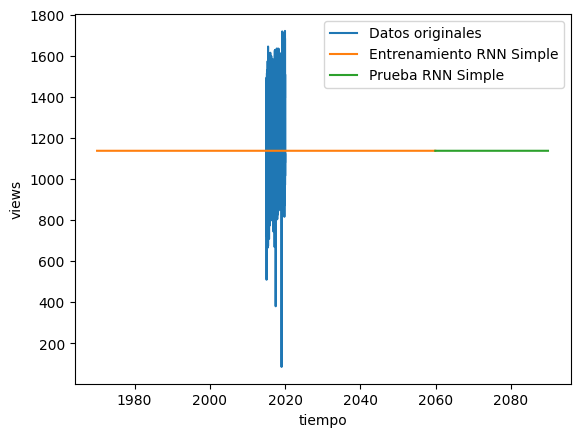

In [31]:
train_pred_simple_plot = np.empty_like(data_vf)
train_pred_simple_plot[:,:] = np.nan
train_pred_simple_plot[longitud:len(train_pred_simple_norm)+longitud,:] = train_pred_simple_norm

test_pred_simple_plot = np.empty_like(data_vf)
test_pred_simple_plot[:,:] = np.nan
test_pred_simple_plot[len(train_pred_simple_norm)+longitud:len(train_pred_simple_norm)+ longitud+len(test_pred_simple_norm),:] = test_pred_simple_norm

plt.plot(data['nat_demand'],label='Datos originales')
plt.plot(train_pred_simple_plot,label='Entrenamiento RNN Simple')
plt.plot(test_pred_simple_plot,label='Prueba RNN Simple')
plt.legend()
plt.xlabel('tiempo')
plt.ylabel('views')
plt.show()

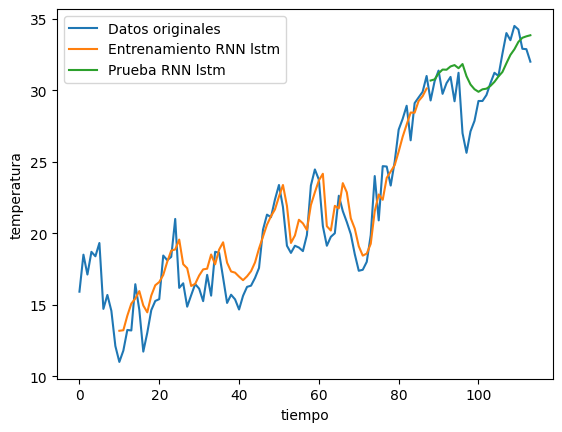

In [59]:
train_pred_lstm_plot = np.empty_like(data_vf)
train_pred_lstm_plot[:,:] = np.nan
train_pred_lstm_plot[longitud:len(train_pred_lstm_norm)+longitud,:] = train_pred_lstm_norm

test_pred_lstm_plot = np.empty_like(data_vf)
test_pred_lstm_plot[:,:] = np.nan
test_pred_lstm_plot[len(train_pred_lstm_norm)+longitud:len(train_pred_lstm_norm)+ longitud+len(test_pred_lstm_norm),:] = test_pred_lstm_norm

plt.plot(data['meantemp'],label='Datos originales')
plt.plot(train_pred_lstm_plot,label='Entrenamiento RNN lstm')
plt.plot(test_pred_lstm_plot,label='Prueba RNN lstm')
plt.legend()
plt.xlabel('tiempo')
plt.ylabel('temperatura')
plt.show()

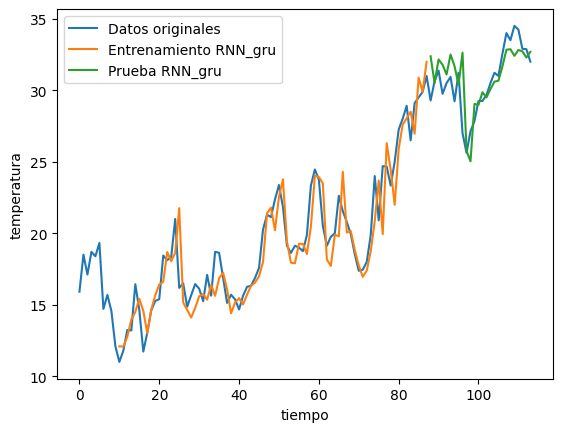

In [51]:
train_pred_gru_plot = np.empty_like(data_vf)
train_pred_gru_plot[:,:] = np.nan
train_pred_gru_plot[longitud:len(train_pred_gru_norm)+longitud,:] = train_pred_gru_norm

test_pred_gru_plot = np.empty_like(data_vf)
test_pred_gru_plot[:,:] = np.nan
test_pred_gru_plot[len(train_pred_gru_norm)+longitud:len(train_pred_gru_norm)+ longitud+len(test_pred_gru_norm),:] = test_pred_gru_norm

plt.plot(data['meantemp'],label='Datos originales')
plt.plot(train_pred_gru_plot,label='Entrenamiento RNN_gru')
plt.plot(test_pred_gru_plot,label='Prueba RNN_gru')
plt.legend()
plt.xlabel('tiempo')
plt.ylabel('temperatura')
plt.show()

In [60]:
from sklearn.metrics import r2_score

In [61]:
y_test.shape

(26, 1)

In [62]:
test_pred_gru_plot.shape

(114, 1)

In [63]:
test_pred_gru_norm.shape

(26, 1)

In [ ]:
print(scaler.inverse_transform(y_test))

[[29.28571429]
 [30.625     ]
 [31.375     ]
 [29.75      ]
 [30.5       ]
 [30.93333333]
 [29.23076923]
 [31.22222222]
 [27.        ]
 [25.625     ]
 [27.125     ]
 [27.85714286]
 [29.25      ]
 [29.25      ]
 [29.66666667]
 [30.5       ]
 [31.22222222]
 [31.        ]
 [32.55555556]
 [34.        ]
 [33.5       ]
 [34.5       ]
 [34.25      ]
 [32.9       ]
 [32.875     ]
 [32.        ]]


In [ ]:
print(test_pred_gru_norm)

[[29.338312]
 [27.725117]
 [28.514967]
 [28.537277]
 [28.78791 ]
 [28.546543]
 [28.466383]
 [27.493427]
 [28.587479]
 [26.105227]
 [25.1525  ]
 [25.997644]
 [26.125183]
 [26.746874]
 [26.551073]
 [26.998472]
 [27.266277]
 [28.689554]
 [29.537634]
 [29.95079 ]
 [30.39128 ]
 [29.764696]
 [30.410143]
 [30.229828]
 [29.583372]
 [29.560347]]


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
print(mean_absolute_error(scaler.inverse_transform(y_test),test_pred_gru_norm))

2.583881648233757


In [ ]:
print(mean_absolute_error(scaler.inverse_transform(y_test),test_pred_lstm_norm))

1.7300600767740235


In [ ]:
print(mean_absolute_error(scaler.inverse_transform(y_test),test_pred_simple_norm))

2.5889067887655277
